In [1]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install wordcloud

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset
os.chdir('C:\\Users\\diwak\\OneDrive\\Documents\\Machine Learning Case Studies - Term 2.2\\15. Capstone Case Study - NLP- Woman Clothing E-Commerce Platform_')
data = pd.read_excel('Womens Clothing Reviews Data.xlsx')


In [4]:
data

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1
...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,General Petite,Dresses,Dresses,Gurgaon,Mobile,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1
23482,862,General Petite,Tops,Knits,Gurgaon,Web,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1
23483,1104,General Petite,Dresses,Dresses,Gurgaon,Web,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0
23484,1084,General,Dresses,Dresses,Gurgaon,Web,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1


In [5]:
# Basic data exploration
print(data.head())
print(data.info())
print(data.describe())


   Product ID        Category Subcategory1 SubCategory2   Location Channel  \
0         767       Initmates     Intimate    Intimates     Mumbai  Mobile   
1        1080         General      Dresses      Dresses  Bangalore  Mobile   
2        1077         General      Dresses      Dresses    Gurgaon  Mobile   
3        1049  General Petite      Bottoms        Pants    Chennai     Web   
4         847         General         Tops      Blouses  Bangalore     Web   

   Customer Age             Review Title  \
0            33                      NaN   
1            34                      NaN   
2            60  Some major design flaws   
3            50         My favorite buy!   
4            47         Flattering shirt   

                                         Review Text  Rating  Recommend Flag  
0  Absolutely wonderful - silky and sexy and comf...       4               1  
1  Love this dress!  it's sooo pretty.  i happene...       5               1  
2  I had such high hopes for 

In [6]:
data.dtypes

Product ID         int64
Category          object
Subcategory1      object
SubCategory2      object
Location          object
Channel           object
Customer Age       int64
Review Title      object
Review Text       object
Rating             int64
Recommend Flag     int64
dtype: object

# Distribution of Ratings

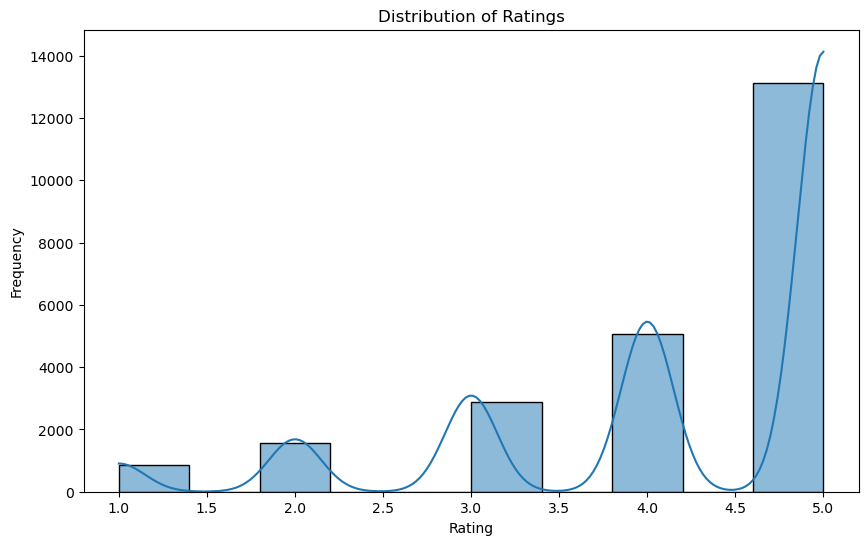

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Review Counts by Category and Subcategory

In [8]:
category_counts = data['Category'].value_counts()
subcategory1_counts = data['Subcategory1'].value_counts()
subcategory2_counts = data['SubCategory2'].value_counts()

print("Category Counts:\n", category_counts)
print("Subcategory1 Counts:\n", subcategory1_counts)
print("Subcategory2 Counts:\n", subcategory2_counts)

Category Counts:
 Category
General           13850
General Petite     8120
Initmates          1502
Name: count, dtype: int64
Subcategory1 Counts:
 Subcategory1
Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
Name: count, dtype: int64
Subcategory2 Counts:
 SubCategory2
Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
Casual bottoms       2
Chemises             1
Name: count, dtype: int64


# Ratings by Location and Age Group

In [9]:
# Ratings by Location
location_ratings = data.groupby('Location')['Rating'].mean().sort_values()
print(location_ratings)

# Ratings by Age Group
age_bins = [0, 18, 25, 35, 50, 65, 100]
age_labels = ['0-18', '19-25', '26-35', '36-50', '51-65', '65+']
data['Age_Group'] = pd.cut(data['Customer Age'], bins=age_bins, labels=age_labels)

age_group_ratings = data.groupby('Age_Group')['Rating'].mean().sort_values()
print(age_group_ratings)

Location
Bangalore    4.187979
Gurgaon      4.191928
Chennai      4.199227
Mumbai       4.205990
Name: Rating, dtype: float64
Age_Group
26-35    4.136451
36-50    4.177175
65+      4.230172
51-65    4.268963
19-25    4.292043
0-18     4.500000
Name: Rating, dtype: float64


# Reviews by Channel

In [10]:
channel_counts = data['Channel'].value_counts()
print(channel_counts)

channel_ratings = data.groupby('Channel')['Rating'].mean().sort_values()
print(channel_ratings)

Channel
Web       13583
Mobile     9903
Name: count, dtype: int64
Channel
Web       4.181919
Mobile    4.215389
Name: Rating, dtype: float64


# Text Mining and Word Clouds

# Preprocess Text Data

In [11]:
data['Review Text'] = data['Review Text'].astype(str)

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

data['Cleaned_Review_Text'] = data['Review Text'].apply(preprocess_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\diwak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\diwak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Generate Word Clouds

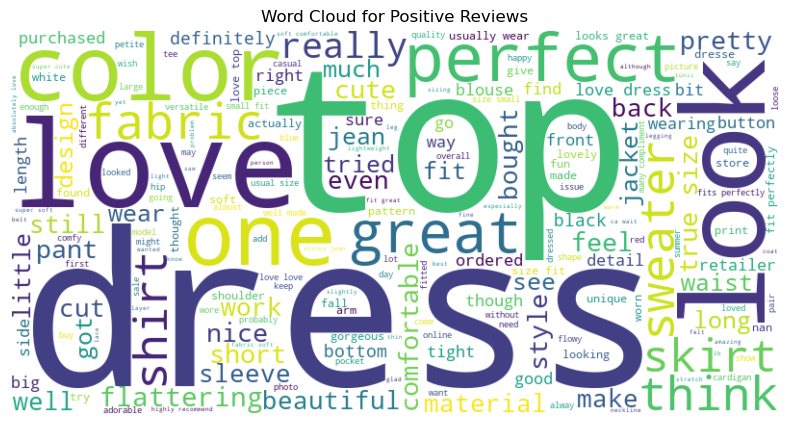

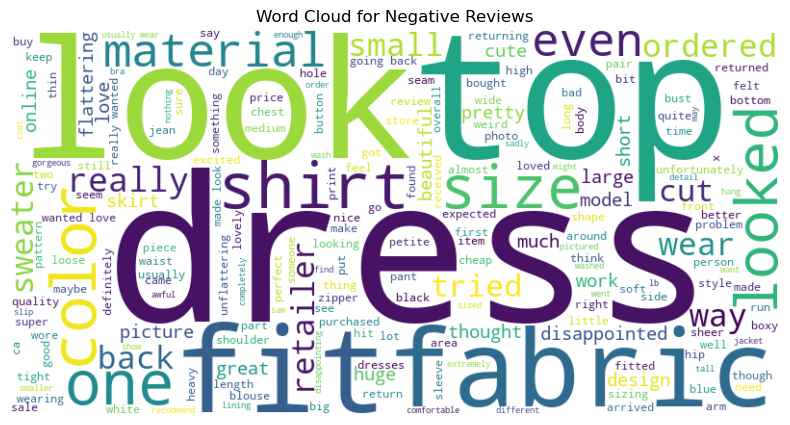

In [13]:
positive_reviews = data[data['Rating'] >= 4]['Cleaned_Review_Text'].str.cat(sep=' ')
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

negative_reviews = data[data['Rating'] <= 2]['Cleaned_Review_Text'].str.cat(sep=' ')
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()

# Sentiment Analysis
  # Sentiment Analysis Using VADER

In [14]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()
data['Sentiment_Score'] = data['Review Text'].apply(lambda x: sid.polarity_scores(x)['compound'])
data['Sentiment'] = data['Sentiment_Score'].apply(lambda x: 'Positive' if x >= 0.05 else ('Negative' if x <= -0.05 else 'Neutral'))

# Sentiment Analysis by Category
sentiment_by_category = data.groupby('Category')['Sentiment'].value_counts().unstack().fillna(0)
print(sentiment_by_category)

# Sentiment Analysis by Location
sentiment_by_location = data.groupby('Location')['Sentiment'].value_counts().unstack().fillna(0)
print(sentiment_by_location)

# Sentiment Analysis by Age Group
sentiment_by_age_group = data.groupby('Age_Group')['Sentiment'].value_counts().unstack().fillna(0)
print(sentiment_by_age_group)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\diwak\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sentiment       Negative  Neutral  Positive
Category                                   
General              838      631     12381
General Petite       450      390      7280
Initmates             87      102      1313
Sentiment  Negative  Neutral  Positive
Location                              
Bangalore       300      246      4678
Chennai         146      113      2070
Gurgaon         526      432      7863
Mumbai          403      333      6376
Sentiment  Negative  Neutral  Positive
Age_Group                             
0-18              0        0         4
19-25            66       50      1103
26-35           340      331      5082
36-50           605      511      9066
51-65           295      193      4680
65+              69       39      1052


# Predictive Analytics
## Predicting Recommendations

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Prepare data for prediction
features = data[['Rating', 'Sentiment_Score']]
target = data['Recommend Flag']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78      1258
           1       0.95      0.95      0.95      5788

    accuracy                           0.92      7046
   macro avg       0.86      0.87      0.87      7046
weighted avg       0.92      0.92      0.92      7046



# Predicting Rating Based on Review

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Prepare data
X = data['Cleaned_Review_Text']
y = data['Rating']

# Text vectorization and regression model
pipeline = make_pipeline(TfidfVectorizer(), LinearRegression())
pipeline.fit(X, y)

# Example prediction
sample_review = ["Great product, very satisfied!"]
predicted_rating = pipeline.predict(sample_review)
print(f'Predicted Rating: {predicted_rating[0]}')

Predicted Rating: 4.101179822568964


# Topic Modeling
# Prepare Data for Topic Modeling

In [17]:
from gensim import corpora, models

# Tokenize the reviews
tokenized_reviews = [text.split() for text in data['Cleaned_Review_Text']]

# Create a dictionary and corpus
dictionary = corpora.Dictionary(tokenized_reviews)
corpus = [dictionary.doc2bow(text) for text in tokenized_reviews]

# Apply LDA
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Print topics
topics = lda_model.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.039*"dress" + 0.020*"top" + 0.019*"fabric" + 0.015*"love"')
(1, '0.023*"love" + 0.023*"jeans" + 0.020*"wear" + 0.019*"great"')
(2, '0.027*"love" + 0.022*"color" + 0.022*"great" + 0.019*"size"')
(3, '0.027*"like" + 0.021*"shirt" + 0.019*"sweater" + 0.016*"back"')
(4, '0.031*"size" + 0.020*"dress" + 0.018*"fit" + 0.018*"small"')


# Visualization and Dashboard

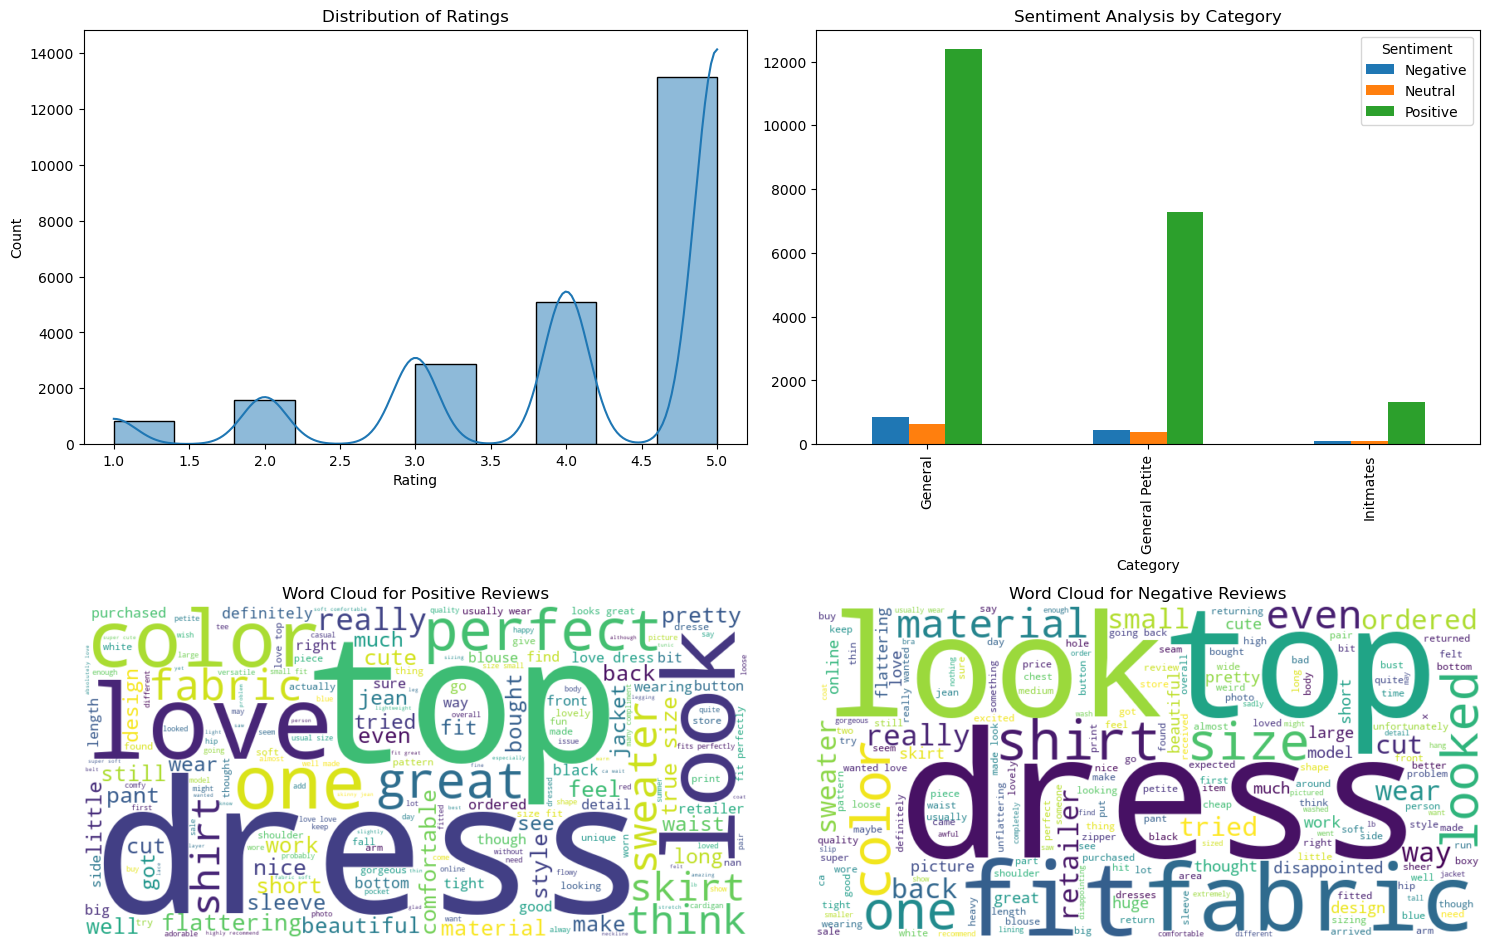

In [18]:
import matplotlib.pyplot as plt

# Define a function to plot multiple visualizations in a grid
def plot_dashboard():
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))

    # Plot 1: Distribution of Ratings
    sns.histplot(data['Rating'], bins=10, kde=True, ax=axs[0, 0])
    axs[0, 0].set_title('Distribution of Ratings')

    # Plot 2: Sentiment Analysis by Category
    sentiment_by_category.plot(kind='bar', ax=axs[0, 1])
    axs[0, 1].set_title('Sentiment Analysis by Category')
    
    # Plot 3: Word Cloud for Positive Reviews
    axs[1, 0].imshow(positive_wordcloud, interpolation='bilinear')
    axs[1, 0].axis('off')
    axs[1, 0].set_title('Word Cloud for Positive Reviews')

    # Plot 4: Word Cloud for Negative Reviews
    axs[1, 1].imshow(negative_wordcloud, interpolation='bilinear')
    axs[1, 1].axis('off')
    axs[1, 1].set_title('Word Cloud for Negative Reviews')

    plt.tight_layout()
    plt.show()

plot_dashboard()